In [26]:
from itertools import count
import networkx as nx
import matplotlib.pyplot as plt

In [27]:
# initialize variables
variables = ['WA', 'NT', 'SA', 'Q', 'NSW', 'V', 'T']
# default domain (possible values) 
domains = ['r', 'g', 'b']


graph = {
    'WA': ['NT', 'SA'], 
    'NT': ['WA', 'SA', 'Q'], 
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'], 
    'Q': ['NT', 'SA', 'NSW'], 
    'NSW': ['Q', 'SA', 'V'], 
    'V': ['SA', 'NSW'], 
    'T': []
}

In [28]:
#defining constraints for graph
def constraints (x1_val, x2_val):
    return x1_val != x2_val

In [29]:
# defining and selecting unassigned value
def unassigned_val(assignment, csp):
    return next(iter([variable for variable in csp.variables if variable not in assignment]), None)

In [30]:
# initialzing CSP class
class CSP:
    
    def __init__(self, variables, domains, constraint_function, graph):
        self.variables = variables
        self.domains = domains
        self.constraints = constraints
        self.graph = graph
        
    def actions(self, assignment):
        if len(assignment) == len(self.variables):
            return []
        var = next(iter([variable for variable in self.variables if variable not in assignment]), None)
        return [(var, val) for val in self.domains[var] if self.nconflicts(var, val, assignment) == 0]
    
    def is_consistent(self, variable, value, assignment):
        return sum([self.number_of_conflicts(variable, value, assignment)]) == 0
    
    def is_conflict(self, variable, value, assignment):
        return variable in assignment and not self.constraints(assignment[variable], value)
    
    def number_of_conflicts(self, variable, value, assignment):
        return sum([self.is_conflict(var, value, assignment) for var in self.graph[variable]])
    
    def is_complete(self, assignment):
        return len(assignment) == len(self.variables)
        
    def order_dom_values(self, variable, assignment):
        domains = self.domains.copy()
        for var in self.graph[variable]:
            if var in assignment and assignment[var] in domains:
                domains.remove(assignment[var])
        return domains
    
  

# Backtracking

In [31]:
# backtracking algorithm
def backtracking(assignment, csp):
    if csp.is_complete(assignment):
        return assignment
    var = unassigned_val(assignment, csp)
    for value in csp.order_dom_values(var, assignment):
        if csp.is_consistent(var, value, assignment):
            assignment[var] = value
            return backtracking(assignment, csp)    
    return None # no possible solutions for our problem

In [32]:
# initializing csp problem using csp class we have created
csp = CSP(variables, domains, constraints, graph)

In [33]:
# finding the solution using backtracking
assignment = backtracking({}, csp)

print(f'Solution using Backtracking algorithm:\n')
print(assignment)

Solution using Backtracking algorithm:

{'WA': 'r', 'NT': 'g', 'SA': 'b', 'Q': 'r', 'NSW': 'g', 'V': 'r', 'T': 'r'}


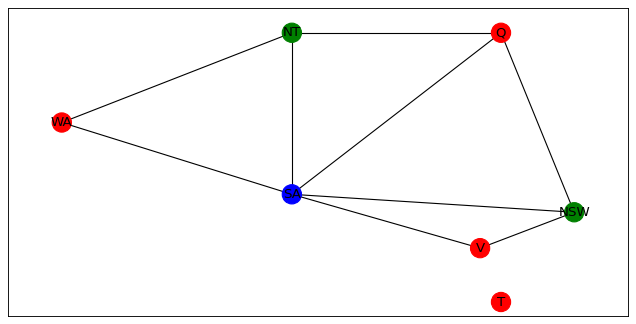

In [34]:
# printing the colored graph
def colored_graph(graph, assignment):
    G = nx.Graph(graph)
    fixed_positions = {'WA': (80, 200), 'NT': (300, 300), 'SA': (300, 120), 'Q': (500, 300), 'NSW': (570, 100), 'V': (480, 60), 'T': (500, 0)}#dict with two of the positions set
    fixed_nodes = fixed_positions.keys()
    plt.figure(figsize=(10,5), dpi=80)
    pos = nx.spring_layout(G,pos=fixed_positions, fixed = fixed_nodes)
    nx.draw_networkx(G,pos, with_labels=True, node_color=[assignment[node] for node in G.nodes()])
    plt.show()

colored_graph(graph, assignment)

# Backjumping

In [35]:
# Now let's try to find solutions using backjumping technique
# Backjumping is a technique that reduces search space, therefore increasing efficiency. 
# While backtracking always goes up one level in the search tree when all values for a variable have been tested, 
# backjumping may go up more levels. 

In [36]:
def upd_failure_history(assignment, history):
    pr_key = [*assignment.keys()][-1] #previous key
    history.setdefault(pr_key, []).append(assignment[pr_key])
    del assignment[pr_key]
    hs_keys = history.keys() #history keys
    if len(hs_keys) > 1:
        del history[[*hs_keys][0]]

def backjumping(assignment, csp, failure_history={}):
    if csp.is_complete(assignment):
        return assignment
    var = unassigned_val(assignment, csp)
    var_history = failure_history.get(var, [])
    for value in csp.order_dom_values(var, assignment):
        if csp.is_consistent(var, value, assignment) and value not in var_history:
            assignment[var] = value
            assignment = backjumping(assignment, csp, failure_history)
            return assignment
    upd_failure_history(assignment, failure_history)
    if assignment:
        assignment = backjumping(assignment, csp, failure_history)
        return assignment
    return None

In [37]:
# finding the solution using backjumping technique
assignment = backjumping({}, csp)

print(f'Solution using Backjumping algorithm:\n')
print(assignment)

Solution using Backjumping algorithm:

{'WA': 'r', 'NT': 'g', 'SA': 'b', 'Q': 'r', 'NSW': 'g', 'V': 'r', 'T': 'r'}
